# Hierarchical clustering

In [41]:
from sklearn import datasets
import numpy as np

In [2]:
data = datasets.load_breast_cancer()

In [3]:
columns = data['feature_names']

In [4]:
X = data['data']
Y = data['target']

In [5]:
X.shape

(569, 30)

In [42]:
np.unique(Y)

array([0, 1])

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(X, columns=columns)

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
X = (X - X.min()) / (X.max() - X.min())  # min-max normalization

In [11]:
from sklearn.decomposition import PCA  # get principal components due to high dimensionality of the dataset

In [12]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [13]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [14]:
import matplotlib.pyplot as plt

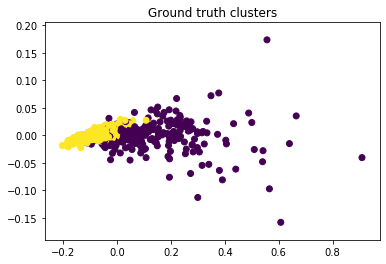

In [54]:
plt.title('Ground truth clusters')
plt.scatter(X2D[:, 0], X2D[:, 1], c=Y)

In [17]:
import scipy.cluster.hierarchy as shc

## Linkage criterion
The linkage criterion determines the metric used for the merge strategy:
- **Maximum or complete** linkage minimizes the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.
- **Average** linkage averages similarity between members i.e. minimizes the average of the distances between all observations of pairs of clusters.
- **Single** linkage works on the similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.
- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

1. A clustering result satisfies
    - Homogeneity if all of its clusters contain only data points which are members of the same original class.
    - Completeness if all the data points that are members of a given class are elements of the same automatic cluster.
 
Both scores have positive values between 0.0 and 1.0, larger values being desirable.

V-measure: $ v = \frac{2*(homogeneity*completeness)}{(homogeneity+completeness)}$

In [22]:
from sklearn.cluster import AgglomerativeClustering  # bottom-up
from sklearn import metrics

In [26]:
from sklearn.neighbors import kneighbors_graph

In [23]:
def calc_metrics(clf, y):
    h = metrics.homogeneity_score(y.ravel(), clf.labels_)
    c = metrics.completeness_score(y.ravel(), clf.labels_)
    v = metrics.v_measure_score(y.ravel(), clf.labels_)
    return h, c, v

In [76]:
def clusterize(x, y, linkage, n_clusters=2, connectivity=None, compute_full_tree=False, dist_threshold=None):
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters, linkage=linkage, connectivity=connectivity,
        compute_full_tree=compute_full_tree, distance_threshold=dist_threshold
    )
    clustering.fit(x)
    h, c, v = calc_metrics(clustering, y)
    fig = plt.figure()
    plt.title("%(linkage)s\nHomogeneity %(h).2f|Completeness %(c).2f|V_measure %(v).2f" % {
        'linkage': linkage, 'h': h, 'c': c, 'v': v
    }, size=10)
    plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_)
    plt.tight_layout()

    plt.show()

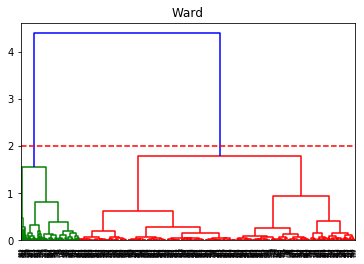

In [69]:
plt.title('Ward') 
shc.dendrogram((shc.linkage(X2D, method='ward'))) 
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

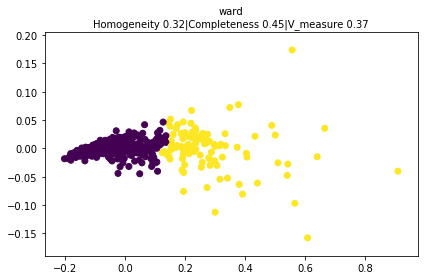

In [78]:
clusterize(X2D, Y, 'ward', n_clusters=None, compute_full_tree=True, dist_threshold=2)

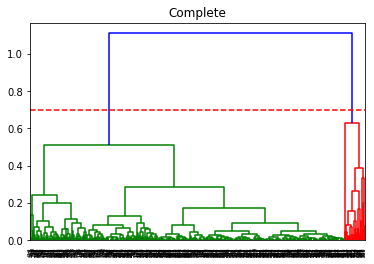

In [19]:
plt.title('Complete') 
shc.dendrogram((shc.linkage(X2D, method='complete'))) 
plt.axhline(y=0.7, color='r', linestyle='--')
plt.show()

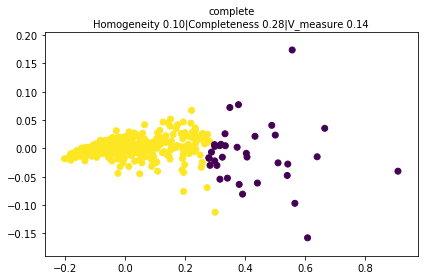

In [79]:
clusterize(X2D, Y, 'complete', n_clusters=None, compute_full_tree=True, dist_threshold=0.7)

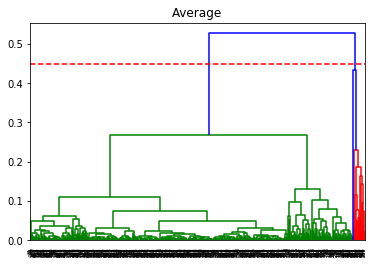

In [20]:
plt.title('Average')
shc.dendrogram((shc.linkage(X2D, method='average'))) 
plt.axhline(y=0.45, color='r', linestyle='--')
plt.show()

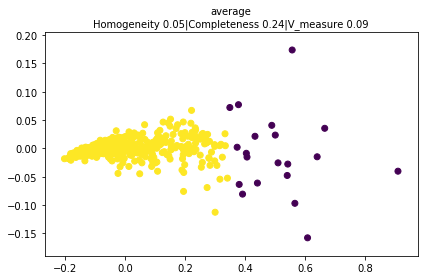

In [80]:
clusterize(X2D, Y, 'average', n_clusters=None, compute_full_tree=True, dist_threshold=0.45)

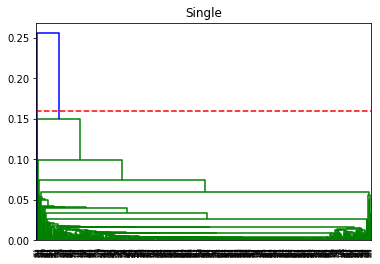

In [21]:
plt.title('Single')
shc.dendrogram((shc.linkage(X2D, method='single'))) 
plt.axhline(y=0.16, color='r', linestyle='--')
plt.show()

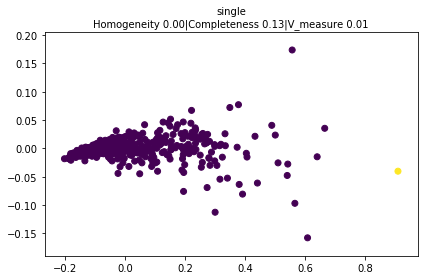

In [81]:
clusterize(X2D, Y, 'single', n_clusters=None, compute_full_tree=True, dist_threshold=0.16)

### Adding connectivity constraints

These constraints are useful to impose a certain local structure, they also make the algorithm faster, especially when the number of the samples is high. The connectivity constraints are imposed via a connectivity matrix: a sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected.

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


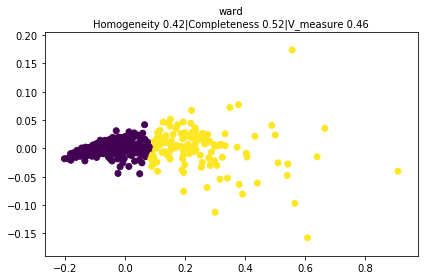

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


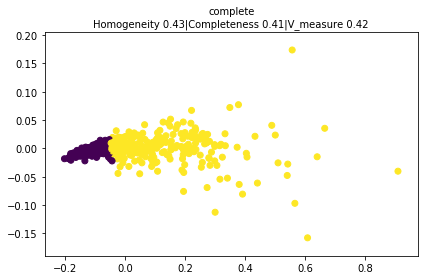

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


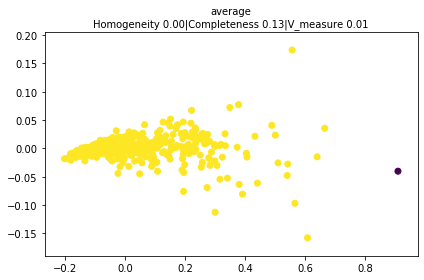

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


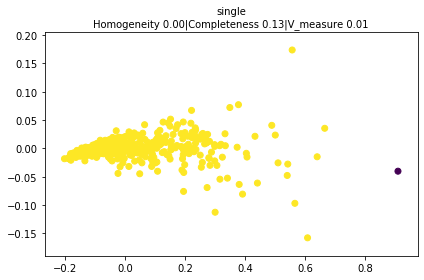

In [83]:
knn_graph = kneighbors_graph(X2D, 2)  # connectivity graph with the 2 nearest neighbors
connectivity = knn_graph.toarray()
for linkage in ['ward', 'complete', 'average', 'single']:
    clusterize(X2D, Y, linkage, connectivity=connectivity)

In [34]:
iris = datasets.load_iris()

In [36]:
xIris = iris['data']
yIris = iris['target']

In [37]:
xIris.shape

(150, 4)

In [43]:
np.unique(yIris)

array([0, 1, 2])

In [44]:
pd.DataFrame(xIris).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
xIris = (xIris - xIris.min()) / (xIris.max() - xIris.min())

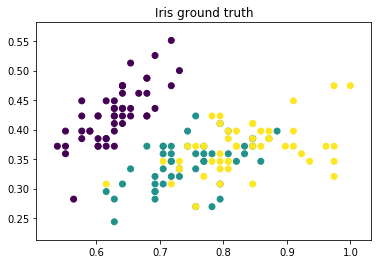

In [62]:
plt.title('Iris ground truth')
plt.scatter(xIris[:, 0], xIris[:, 1], c=yIris)

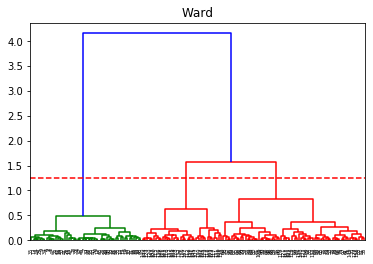

In [72]:
plt.title('Ward') 
shc.dendrogram((shc.linkage(xIris, method='ward'))) 
plt.axhline(y=1.25, color='r', linestyle='--')
plt.show()

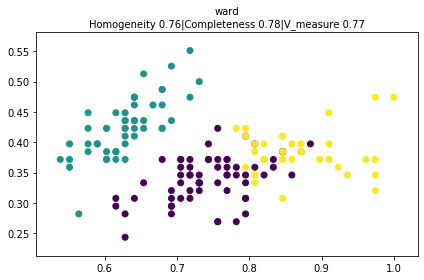

In [84]:
clusterize(xIris, yIris, 'ward', n_clusters=None, compute_full_tree=True, dist_threshold=1.25)

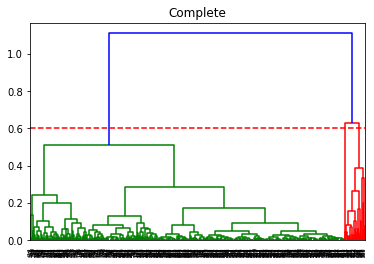

In [74]:
plt.title('Complete') 
shc.dendrogram((shc.linkage(X2D, method='complete'))) 
plt.axhline(y=0.6, color='r', linestyle='--')
plt.show()

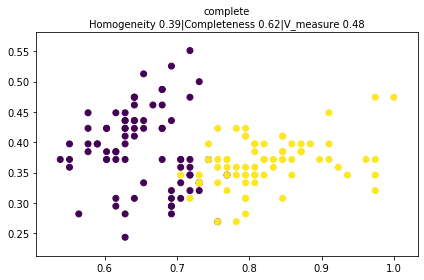

In [86]:
clusterize(xIris, yIris, 'complete', n_clusters=None, compute_full_tree=True, dist_threshold=0.6)

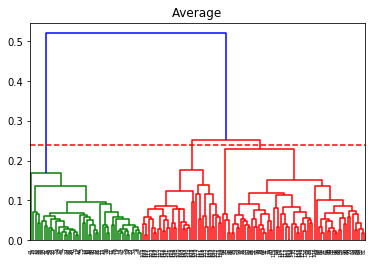

In [89]:
plt.title('Average')
shc.dendrogram((shc.linkage(xIris, method='average'))) 
plt.axhline(y=0.24, color='r', linestyle='--')
plt.show()

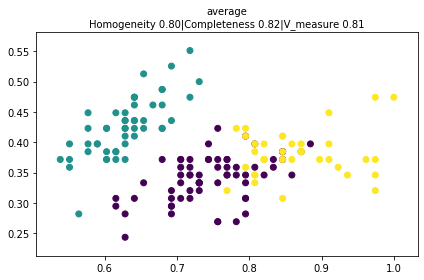

In [91]:
clusterize(xIris, yIris, 'average', n_clusters=None, compute_full_tree=True, dist_threshold=0.24)

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


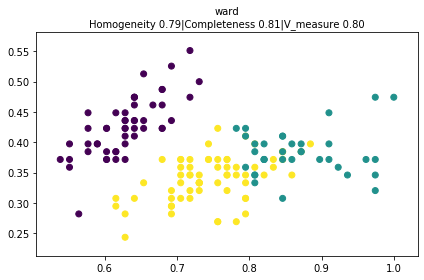

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


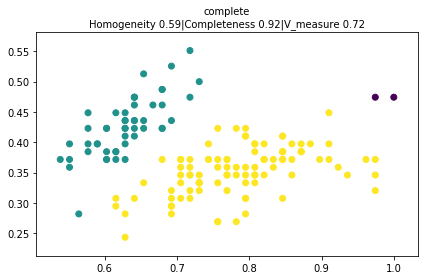

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


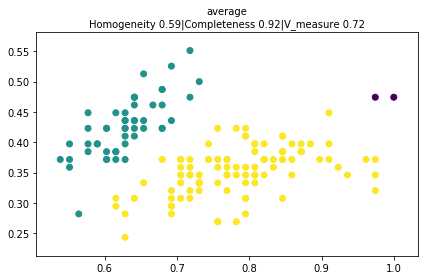

/home/guilherme/.virtualenvs/tensorflowgpu_venv/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


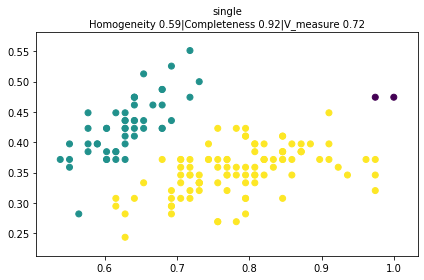

In [94]:
knn_graph = kneighbors_graph(xIris, 2)  # connectivity graph with the 2 nearest neighbors
connectivity = knn_graph.toarray()
for linkage in ['ward', 'complete', 'average', 'single']:
    clusterize(xIris, yIris, linkage, n_clusters=3, connectivity=connectivity)